In [24]:
!nvidia-smi

Fri Oct 28 06:42:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    33W /  70W |   9156MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 17 kB/s 
     |████████████████████████████████| 1.7 MB 55.9 MB/s 
     |████████████████████████████████| 5.9 MB 55.9 MB/s 
     |████████████████████████████████| 438 kB 74.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [25]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix , classification_report
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [26]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Multiclass Brats VGG16/train'
valid_path = '/content/drive/MyDrive/Multiclass Brats VGG16/test'

In [27]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [28]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [29]:
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Multiclass Brats VGG16/train/*')

In [30]:
folders

['/content/drive/MyDrive/Multiclass Brats VGG16/train/0',
 '/content/drive/MyDrive/Multiclass Brats VGG16/train/1',
 '/content/drive/MyDrive/Multiclass Brats VGG16/train/3',
 '/content/drive/MyDrive/Multiclass Brats VGG16/train/2']

In [31]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [32]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [33]:
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [34]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [35]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Multiclass Brats VGG16/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Multiclass Brats VGG16/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [36]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
90/90 [==============================] - 46s 508ms/step - loss: 0.8175 - accuracy: 0.6920 - val_loss: 1.3805 - val_accuracy: 0.5431
Epoch 2/50
90/90 [==============================] - 47s 524ms/step - loss: 0.4676 - accuracy: 0.8233 - val_loss: 1.4370 - val_accuracy: 0.6497
Epoch 3/50
90/90 [==============================] - 45s 499ms/step - loss: 0.3581 - accuracy: 0.8610 - val_loss: 1.6008 - val_accuracy: 0.6802
Epoch 4/50
90/90 [==============================] - 44s 490ms/step - loss: 0.2824 - accuracy: 0.8983 - val_loss: 1.5033 - val_accuracy: 0.7208
Epoch 5/50
90/90 [==============================] - 44s 490ms/step - loss: 0.2461 - accuracy: 0.9115 - val_loss: 1.4889 - val_accuracy: 0.7259
Epoch 6/50
90/90 [==============================] - 46s 512ms/step - loss: 0.2283 - accuracy: 0.9230 - val_loss: 1.7453 - val_accuracy: 0.7487
Epoch 7/50
90/90 [==============================] - 44s 493ms/step - loss: 0.2087 - accuracy: 0.9237 - val_loss: 1.5639 - val_accuracy: 0.7386

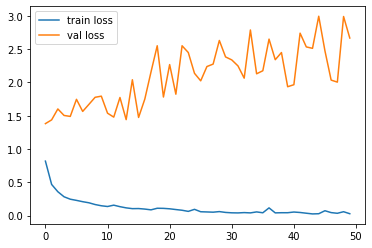

<Figure size 432x288 with 0 Axes>

In [37]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

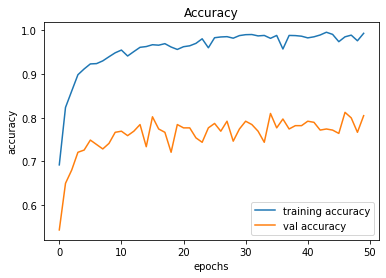

In [38]:
# accuracy 
plt.figure(0)
plt.plot(r.history['accuracy'], label='training accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()